In [43]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO
import glob


sns.set_theme(style="white")
sns.set_context("talk")


In [6]:
files = glob.glob("/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/benchfam_ref/evaluation/library/*.score_ascii")

In [30]:
def get_tcs(file): 
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SCORE='):
                family = os.path.basename(file).split(".")[0]
                library_method = os.path.basename(file).split(".")[1]
                score = float(line.split("=")[1].strip())
                if(library_method == "progressive"): 
                    library_method = "3DCOFFEE"
                break
        entry = pd.DataFrame([{ "family": family, "library_method": library_method, "tcs": score}])
        return entry

In [31]:
summary = pd.DataFrame()
for file in files:
    summary = pd.concat([summary,get_tcs(file)], ignore_index=True)

In [33]:
summary.head(2)

,family,library_method,tcs
0,PF00441-ref,fs_only,872.0
1,PF00890-ref,proba_only,791.0


In [29]:
summary.to_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/refs/benchfam/tcs.csv", index = False)

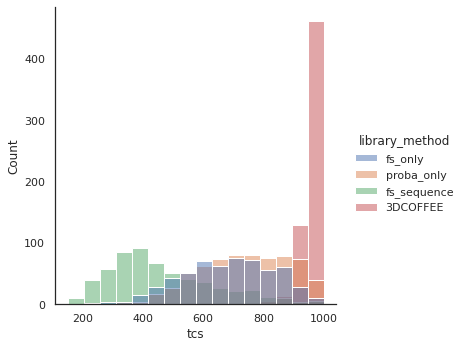

In [64]:
sns.displot(data = summary, x = "tcs", hue = "library_method", alpha = 0.5)

<AxesSubplot:xlabel='tcs', ylabel='library_method'>

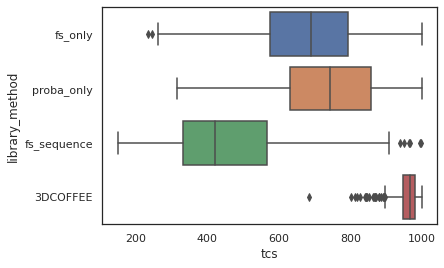

In [63]:
sns.boxplot(data = summary, x = "tcs", y = "library_method")